In [1]:
#imports
import numpy as np
import random as rd
import pandas as pd
import tensorflow as tf
from IPython.display import Video,Audio
import dlib
import cv2
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
import pickle
import librosa
import librosa.display
tf.test.gpu_device_name()
#print("Done")

2024-07-28 12:23:45.363517: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


''

In [2]:
seed_constant = 27
np.random.seed(seed_constant)
rd.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [3]:
dir = '/var/scratch/mpa326/'
video_folder = '/var/scratch/mpa326/CREMA-D/VideoFlash'
audio_folder = '/var/scratch/mpa326/CREMA-D/AudioWAV'

In [4]:
df = pd.read_csv("/var/scratch/mpa326/CREMA-D/finishedEmoResponses.csv")

In [5]:
df

,Unnamed: 0,localid,sessionNums,queryType,questNum,pos,ttr,numTries,clipNum,clipName
0,4,SSI_1090000584,1,1,91,4,4748.0,0,7443,ANG_HI_practice
1,8,SSI_1090000584,1,1,92,8,7521.0,0,7444,SAD_MD_practice
2,12,SSI_1090000584,1,1,1,12,10475.0,0,768,1010_MTI_SAD_XX
3,16,SSI_1090000584,1,1,2,16,3914.0,0,2981,1037_IWL_HAP_XX
4,20,SSI_1090000584,1,1,3,20,3265.0,0,1736,1022_IWW_FEA_XX
...,...,...,...,...,...,...,...,...,...,...
258927,1100026,SSI_1089998356,14766,3,29,404,1453.0,0,1560,1020_TIE_FEA_XX
258928,1100030,SSI_1089998356,14766,3,30,408,3032.0,0,3303,1041_MTI_HAP_XX
258929,1100034,SSI_1089998356,14766,3,31,412,1563.0,0,4548,1056_ITH_FEA_XX
258930,1100038,SSI_1089998356,14766,3,32,416,1641.0,0,7287,1090_IEO_ANG_MD


In [6]:
df_response = pd.read_csv("/var/scratch/mpa326/CREMA-D/finishedResponses.csv")

/tmp/ipykernel_23202/3838995148.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_response = pd.read_csv("/var/scratch/mpa326/CREMA-D/finishedResponses.csv")


In [7]:
df_response

,Unnamed: 0,localid,pos,ans,ttr,queryType,numTries,clipNum,questNum,subType,clipName,sessionNums,respEmo,respLevel,dispEmo,dispVal,dispLevel
0,13,SSI_1090000584,13,N_58,14516,1,0,768,1,4,1010_MTI_SAD_XX,1,N,58,S,50.0,X
1,17,SSI_1090000584,17,H_39,6977,1,0,2981,2,4,1037_IWL_HAP_XX,1,H,39,H,50.0,X
2,21,SSI_1090000584,21,S_79,5760,1,0,1736,3,4,1022_IWW_FEA_XX,1,S,79,F,50.0,X
3,25,SSI_1090000584,25,F_40,10512,1,0,5471,4,4,1067_WSI_HAP_XX,1,F,40,H,50.0,X
4,29,SSI_1090000584,29,N_88,6911,1,0,21,5,4,1001_TIE_FEA_XX,1,N,88,F,50.0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219683,1100027,SSI_1089998356,405,S_53,3578,3,0,1560,29,4,1020_TIE_FEA_XX,14766,S,53,F,50.0,X
219684,1100031,SSI_1089998356,409,H_15,6235,3,0,3303,30,4,1041_MTI_HAP_XX,14766,H,15,H,50.0,X
219685,1100035,SSI_1089998356,413,S_65,4656,3,0,4548,31,4,1056_ITH_FEA_XX,14766,S,65,F,50.0,X
219686,1100039,SSI_1089998356,417,D_69,3875,3,0,7287,32,4,1090_IEO_ANG_MD,14766,D,69,A,50.0,M


In [8]:
(df_response['clipName']=='1022_IWW_FEA_XX').nunique()

2

In [9]:
df_demo = pd.read_csv("/var/scratch/mpa326/CREMA-D/VideoDemographics.csv")

In [10]:
df_demo

,ActorID,Age,Sex,Race,Ethnicity
0,1001,51,Male,Caucasian,Not Hispanic
1,1002,21,Female,Caucasian,Not Hispanic
2,1003,21,Female,Caucasian,Not Hispanic
3,1004,42,Female,Caucasian,Not Hispanic
4,1005,29,Male,African American,Not Hispanic
...,...,...,...,...,...
86,1087,62,Male,Caucasian,Not Hispanic
87,1088,23,Male,African American,Not Hispanic
88,1089,24,Female,Caucasian,Not Hispanic
89,1090,50,Male,Asian,Not Hispanic


In [11]:
df_sentence = pd.read_csv("/var/scratch/mpa326/CREMA-D/SentenceFilenames.csv")

In [12]:
df_sentence

,Stimulus_Number,Filename
0,1,1001_IEO_NEU_XX
1,2,1001_IEO_HAP_LO
2,3,1001_IEO_HAP_MD
3,4,1001_IEO_HAP_HI
4,5,1001_IEO_SAD_LO
...,...,...
7437,7438,1091_WSI_HAP_XX
7438,7439,1091_WSI_SAD_XX
7439,7440,1091_WSI_ANG_XX
7440,7441,1091_WSI_FEA_XX


In [13]:
import getData 
df_video=getData.getdata(video_folder)
df_video.head()

,Audio_file,actor_id,sentence,emotion,emotional_intensity
0,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,ANG,XX
1,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,DIS,XX
2,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,FEA,XX
3,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,HAP,XX
4,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,NEU,XX


In [14]:
df_video

,Audio_file,actor_id,sentence,emotion,emotional_intensity
0,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,ANG,XX
1,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,DIS,XX
2,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,FEA,XX
3,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,HAP,XX
4,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,NEU,XX
...,...,...,...,...,...
7437,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,1091,WSI,DIS,XX
7438,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,1091,WSI,FEA,XX
7439,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,1091,WSI,HAP,XX
7440,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,1091,WSI,NEU,XX


In [15]:
df_video['ActorID'] = df_video['actor_id'].astype(int)
df_demo['ActorID'] = df_demo['ActorID'].astype(int)

In [16]:
df_video_merged = pd.merge(df_video, df_demo, on='ActorID', how='left')

In [17]:
df_video_merged

,Audio_file,actor_id,sentence,emotion,emotional_intensity,ActorID,Age,Sex,Race,Ethnicity
0,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,ANG,XX,1001,51,Male,Caucasian,Not Hispanic
1,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,DIS,XX,1001,51,Male,Caucasian,Not Hispanic
2,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,FEA,XX,1001,51,Male,Caucasian,Not Hispanic
3,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,HAP,XX,1001,51,Male,Caucasian,Not Hispanic
4,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,1001,DFA,NEU,XX,1001,51,Male,Caucasian,Not Hispanic
...,...,...,...,...,...,...,...,...,...,...
7437,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,1091,WSI,DIS,XX,1091,29,Female,Asian,Not Hispanic
7438,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,1091,WSI,FEA,XX,1091,29,Female,Asian,Not Hispanic
7439,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,1091,WSI,HAP,XX,1091,29,Female,Asian,Not Hispanic
7440,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,1091,WSI,NEU,XX,1091,29,Female,Asian,Not Hispanic


In [18]:
df_video_merged['Sex'].value_counts()

Sex
Male      3930
Female    3512
Name: count, dtype: int64

In [19]:
df_video_merged['Race'].value_counts()

Race
Caucasian           4988
African American    1804
Asian                568
Unknown               82
Name: count, dtype: int64

In [20]:
df_video_merged['Ethnicity'].value_counts()

Ethnicity
Not Hispanic    6622
Hispanic         820
Name: count, dtype: int64

In [21]:
df_video_merged.groupby(['emotion', 'Sex', 'Race']).size().unstack()

Race            African American  Asian  Caucasian  Unknown
emotion Sex                                                
ANG     Female             126.0   28.0      432.0     14.0
        Male               182.0   69.0      420.0      NaN
DIS     Female             126.0   28.0      432.0     14.0
        Male               182.0   69.0      420.0      NaN
FEA     Female             126.0   28.0      432.0     14.0
        Male               182.0   69.0      420.0      NaN
HAP     Female             126.0   28.0      432.0     14.0
        Male               182.0   69.0      420.0      NaN
NEU     Female             108.0   24.0      368.0     12.0
        Male               156.0   59.0      360.0      NaN
SAD     Female             126.0   28.0      432.0     14.0
        Male               182.0   69.0      420.0      NaN

In [22]:
df_video_merged.drop(columns=['actor_id'])

,Audio_file,sentence,emotion,emotional_intensity,ActorID,Age,Sex,Race,Ethnicity
0,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,DFA,ANG,XX,1001,51,Male,Caucasian,Not Hispanic
1,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,DFA,DIS,XX,1001,51,Male,Caucasian,Not Hispanic
2,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,DFA,FEA,XX,1001,51,Male,Caucasian,Not Hispanic
3,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,DFA,HAP,XX,1001,51,Male,Caucasian,Not Hispanic
4,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...,DFA,NEU,XX,1001,51,Male,Caucasian,Not Hispanic
...,...,...,...,...,...,...,...,...,...
7437,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,WSI,DIS,XX,1091,29,Female,Asian,Not Hispanic
7438,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,WSI,FEA,XX,1091,29,Female,Asian,Not Hispanic
7439,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,WSI,HAP,XX,1091,29,Female,Asian,Not Hispanic
7440,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_WS...,WSI,NEU,XX,1091,29,Female,Asian,Not Hispanic


In [23]:
from videoprops import get_video_properties
import ffmpeg
from ffmpeg import _probe
#probe = _probe.probe(path)

def video_properties(file_path):
    try:
        probe = ffmpeg._probe.probe(file_path)
        video_info = next(s for s in probe['streams'] if s['codec_type'] == 'video')

        props = {
            'codec_name': video_info.get('codec_name', None),
            'width': video_info.get('width', None),
            'height': video_info.get('height', None),
            'avg_frame_rate': video_info.get('avg_frame_rate', '0/0'),
            'display_aspect_ratio': video_info.get('display_aspect_ratio', None),
            'nb_frames': int(video_info.get('nb_frames', 0)),
            'duration': float(probe['format']['duration']),
        }

        # Calculate FPS from avg_frame_rate if possible
        fps = eval(props['avg_frame_rate'])
        props['fps'] = fps if fps > 0 else 0
        props['dir'] = file_path

        return props
    
    except Exception as e:
        print(f"Error retrieving properties for {file_path}: {e}")
        return None

In [24]:
video_properties('/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DFA_ANG_XX.flv')

{'codec_name': 'vp6f',
 'width': 480,
 'height': 360,
 'avg_frame_rate': '989/33',
 'display_aspect_ratio': None,
 'nb_frames': 0,
 'duration': 2.235,
 'fps': 29.96969696969697,
 'dir': '/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DFA_ANG_XX.flv'}

In [25]:
f=list(df_video_merged.Audio_file)

In [26]:
len(f)

7442

In [27]:
df_video_properties=map(video_properties,f[:7442])

In [28]:
print(df_video_properties)

In [29]:
df_video_properties=list(df_video_properties)

In [30]:
print(df_video_properties)

[{'codec_name': 'vp6f', 'width': 480, 'height': 360, 'avg_frame_rate': '989/33', 'display_aspect_ratio': None, 'nb_frames': 0, 'duration': 2.235, 'fps': 29.96969696969697, 'dir': '/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DFA_ANG_XX.flv'}, {'codec_name': 'vp6f', 'width': 480, 'height': 360, 'avg_frame_rate': '989/33', 'display_aspect_ratio': None, 'nb_frames': 0, 'duration': 2.335, 'fps': 29.96969696969697, 'dir': '/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DFA_DIS_XX.flv'}, {'codec_name': 'vp6f', 'width': 480, 'height': 360, 'avg_frame_rate': '989/33', 'display_aspect_ratio': None, 'nb_frames': 0, 'duration': 2.168, 'fps': 29.96969696969697, 'dir': '/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DFA_FEA_XX.flv'}, {'codec_name': 'vp6f', 'width': 480, 'height': 360, 'avg_frame_rate': '989/33', 'display_aspect_ratio': None, 'nb_frames': 0, 'duration': 1.868, 'fps': 29.96969696969697, 'dir': '/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DFA_HAP_XX.flv'}, {'codec_name': 'vp6f', 'width': 480

In [31]:
df=pd.DataFrame(df_video_properties)
df.head()

,codec_name,width,height,avg_frame_rate,display_aspect_ratio,nb_frames,duration,fps,dir
0,vp6f,480,360,989/33,None,0,2.235,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...
1,vp6f,480,360,989/33,None,0,2.335,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...
2,vp6f,480,360,989/33,None,0,2.168,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...
3,vp6f,480,360,989/33,None,0,1.868,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...
4,vp6f,480,360,989/33,None,0,2.035,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...


In [32]:
df.insert(1,"emotion",list(df_video_merged.emotion))
df.insert(1,"gender",list(df_video_merged.Sex))
df.insert(1,"race",list(df_video_merged.Race))
df.insert(1,"ActorID",list(df_video_merged.ActorID))
df.insert(1, "ethnicity", list(df_video_merged.Ethnicity))

In [33]:
df.head()

,codec_name,ethnicity,ActorID,race,gender,emotion,width,height,avg_frame_rate,display_aspect_ratio,nb_frames,duration,fps,dir
0,vp6f,Not Hispanic,1001,Caucasian,Male,ANG,480,360,989/33,None,0,2.235,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...
1,vp6f,Not Hispanic,1001,Caucasian,Male,DIS,480,360,989/33,None,0,2.335,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...
2,vp6f,Not Hispanic,1001,Caucasian,Male,FEA,480,360,989/33,None,0,2.168,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...
3,vp6f,Not Hispanic,1001,Caucasian,Male,HAP,480,360,989/33,None,0,1.868,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...
4,vp6f,Not Hispanic,1001,Caucasian,Male,NEU,480,360,989/33,None,0,2.035,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DF...


In [34]:
filtered_df = df[(df['duration'] > -1) & (df['duration'] < 1)]

In [35]:
pd.set_option('display.max_colwidth', None)
print(filtered_df['dir'])

5216    /var/scratch/mpa326/CREMA-D/VideoFlash/1064_TIE_SAD_XX.flv
6186    /var/scratch/mpa326/CREMA-D/VideoFlash/1076_MTI_NEU_XX.flv
Name: dir, dtype: object


In [36]:
df = df.drop(filtered_df.index)

In [37]:
df['duration'].min()

1.267

In [ ]:
##Initial Split by gender and emotions to seperate out 20% test set.

In [38]:
from sklearn.model_selection import train_test_split
emotion_labels = df['emotion']
genders = df['gender']
races = df['race']
ethnicity = df['ethnicity']
combined_labels = [(e, g) for e, g in zip(emotion_labels, genders)]
X_train, X_test, y_train, y_test, gender_train, gender_test, race_train, race_test, ethnicity_train, ethnicity_test = train_test_split(
    df, emotion_labels, genders, races, ethnicity, test_size=0.2, stratify=combined_labels, random_state=42
)

print("Train set shape:", X_train.shape)
#print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

print("Label Train set shape:", y_train.shape)
#print("Label Validation set shape:", y_val.shape)
print("Label Test set shape:", y_test.shape)

print("GenderTrain set shape:", gender_train.shape)
#print("Gender Validation set shape:", gender_val.shape)
print("Gender Test set shape:", gender_test.shape)

Train set shape: (5952, 14)
Test set shape: (1488, 14)
Label Train set shape: (5952,)
Label Test set shape: (1488,)
GenderTrain set shape: (5952,)
Gender Test set shape: (1488,)


In [39]:
X_test.groupby(['emotion', 'gender']).size().unstack()

gender,Female,Male
emotion,,
ANG,120,134
DIS,120,134
FEA,120,134
HAP,120,134
NEU,103,115
SAD,120,134


In [40]:
X_train.groupby(['emotion', 'gender']).size().unstack()

gender,Female,Male
emotion,,
ANG,480,537
DIS,480,537
FEA,480,537
HAP,480,537
NEU,408,460
SAD,480,536


In [41]:
X_train.groupby(['emotion', 'race']).size().unstack()

race,African American,Asian,Caucasian,Unknown
emotion,,,,
ANG,249,80,676,12
DIS,248,85,673,11
FEA,242,69,693,13
HAP,249,73,684,11
NEU,219,67,571,11
SAD,252,72,682,10


In [42]:
X_test.groupby(['emotion', 'race']).size().unstack()

race,African American,Asian,Caucasian,Unknown
emotion,,,,
ANG,59,17,176,2
DIS,60,12,179,3
FEA,66,28,159,1
HAP,59,24,168,3
NEU,45,16,156,1
SAD,56,25,169,4


In [43]:
X_train['gender'].value_counts()

gender
Male      3144
Female    2808
Name: count, dtype: int64

In [44]:
X_test['gender'].value_counts()

gender
Male      785
Female    703
Name: count, dtype: int64

In [ ]:
# Since we do not have more than 2808 female data points available for training. All three test sets are created with keeping that in mind. 
# 60% of the total train split can not exceed more than 2808. That makes the balance 40% - 1872, 
# and a total of 4680 data points across each training split

In [45]:
# 60% female - 40% male
target_male_count = 1872
target_female_count = 2808

# Separate data by gender
males = X_train[X_train['gender'] == 'Male']
females = X_train[X_train['gender'] == 'Female']

# Calculate the current counts
current_male_count = len(males)
current_female_count = len(females)

# Calculate the number to drop for each gender
excess_male = max(0, current_male_count - target_male_count)
excess_female = max(0, current_female_count - target_female_count)

# Calculate how much excess data to drop equally from each emotion
emotion_counts_male = males['emotion'].value_counts()
emotion_counts_female = females['emotion'].value_counts()
emotions = emotion_counts_male.index

# Determine the number to drop from each emotion for both males and females
drop_per_emotion_male = {emotion: (count / current_male_count) * excess_male for emotion, count in emotion_counts_male.items()}
drop_per_emotion_female = {emotion: (count / current_female_count) * excess_female for emotion, count in emotion_counts_female.items()}

# Drop excess data equally across each emotion
def drop_excess(data, drop_per_emotion):
    reduced_data = pd.DataFrame()
    for emotion in emotions:
        emotion_data = data[data['emotion'] == emotion]
        drop_count = int(drop_per_emotion.get(emotion, 0))
        if drop_count > 0 and len(emotion_data) > drop_count:
            sampled_data = emotion_data.sample(n=len(emotion_data) - drop_count, random_state=42)
        else:
            sampled_data = emotion_data
        reduced_data = pd.concat([reduced_data, sampled_data])
    return reduced_data

reduced_males = drop_excess(males, drop_per_emotion_male)
reduced_females = drop_excess(females, drop_per_emotion_female)

X_train_40m_60f = pd.concat([reduced_males, reduced_females])

# Ensure we reach the exact size of target counts
X_train_40m_60f = X_train_40m_60f.groupby('gender').apply(lambda x: x.sample(n=target_male_count if x['gender'].iloc[0] == 'Male' else target_female_count, random_state=42)).reset_index(drop=True)

print(X_train_40m_60f.shape) 
print(X_train_40m_60f['emotion'].value_counts())
print(X_train_40m_60f['gender'].value_counts()) 

X_train_40m_60f.groupby(['emotion', 'gender']).size().unstack()


(4680, 14)
emotion
FEA    800
DIS    800
HAP    800
ANG    799
SAD    799
NEU    682
Name: count, dtype: int64
gender
Female    2808
Male      1872
Name: count, dtype: int64


/tmp/ipykernel_23202/1865492842.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X_train_40m_60f = X_train_40m_60f.groupby('gender').apply(lambda x: x.sample(n=target_male_count if x['gender'].iloc[0] == 'Male' else target_female_count, random_state=42)).reset_index(drop=True)


gender,Female,Male
emotion,,
ANG,480,319
DIS,480,320
FEA,480,320
HAP,480,320
NEU,408,274
SAD,480,319


In [46]:
# 60% male - 40% female
target_male_count = 2808
target_female_count = 1872

# Separate data by gender
males = X_train[X_train['gender'] == 'Male']
females = X_train[X_train['gender'] == 'Female']

# Calculate the current counts
current_male_count = len(males)
current_female_count = len(females)

# Calculate the number to drop for each gender
excess_male = max(0, current_male_count - target_male_count)
excess_female = max(0, current_female_count - target_female_count)

# Calculate how much excess data to drop equally from each emotion
emotion_counts_male = males['emotion'].value_counts()
emotion_counts_female = females['emotion'].value_counts()
emotions = emotion_counts_male.index

# Determine the number to drop from each emotion for both males and females
drop_per_emotion_male = {emotion: (count / current_male_count) * excess_male for emotion, count in emotion_counts_male.items()}
drop_per_emotion_female = {emotion: (count / current_female_count) * excess_female for emotion, count in emotion_counts_female.items()}

# Drop excess data equally across each emotion
def drop_excess(data, drop_per_emotion):
    reduced_data = pd.DataFrame()
    for emotion in emotions:
        emotion_data = data[data['emotion'] == emotion]
        drop_count = int(drop_per_emotion.get(emotion, 0))
        if drop_count > 0 and len(emotion_data) > drop_count:
            sampled_data = emotion_data.sample(n=len(emotion_data) - drop_count, random_state=42)
        else:
            sampled_data = emotion_data
        reduced_data = pd.concat([reduced_data, sampled_data])
    return reduced_data

reduced_males = drop_excess(males, drop_per_emotion_male)
reduced_females = drop_excess(females, drop_per_emotion_female)

X_train_60m_40f = pd.concat([reduced_males, reduced_females])

# Ensure we reach the exact size of target counts
X_train_60m_40f = X_train_60m_40f.groupby('gender').apply(lambda x: x.sample(n=target_male_count if x['gender'].iloc[0] == 'Male' else target_female_count, random_state=42)).reset_index(drop=True)

print(X_train_60m_40f.shape) 
print(X_train_60m_40f['emotion'].value_counts()) 
print(X_train_60m_40f['gender'].value_counts())

X_train_60m_40f.groupby(['emotion', 'gender']).size().unstack()


(4680, 14)
emotion
ANG    800
HAP    800
SAD    799
DIS    799
FEA    799
NEU    683
Name: count, dtype: int64
gender
Male      2808
Female    1872
Name: count, dtype: int64


/tmp/ipykernel_23202/3091218630.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X_train_60m_40f = X_train_60m_40f.groupby('gender').apply(lambda x: x.sample(n=target_male_count if x['gender'].iloc[0] == 'Male' else target_female_count, random_state=42)).reset_index(drop=True)


gender,Female,Male
emotion,,
ANG,320,480
DIS,320,479
FEA,320,479
HAP,320,480
NEU,272,411
SAD,320,479


In [47]:
# 50% - male 50% - female
target_male_count = 2340
target_female_count = 2340

# Separate data by gender
males = X_train[X_train['gender'] == 'Male']
females = X_train[X_train['gender'] == 'Female']

# Calculate the current counts
current_male_count = len(males)
current_female_count = len(females)

# Calculate the number to drop for each gender
excess_male = max(0, current_male_count - target_male_count)
excess_female = max(0, current_female_count - target_female_count)

# Calculate how much excess data to drop equally from each emotion
emotion_counts_male = males['emotion'].value_counts()
emotion_counts_female = females['emotion'].value_counts()
emotions = emotion_counts_male.index

# Determine the number to drop from each emotion for both males and females
drop_per_emotion_male = {emotion: (count / current_male_count) * excess_male for emotion, count in emotion_counts_male.items()}
drop_per_emotion_female = {emotion: (count / current_female_count) * excess_female for emotion, count in emotion_counts_female.items()}

# Drop excess data equally across each emotion
def drop_excess(data, drop_per_emotion):
    reduced_data = pd.DataFrame()
    for emotion in emotions:
        emotion_data = data[data['emotion'] == emotion]
        drop_count = int(drop_per_emotion.get(emotion, 0))
        if drop_count > 0 and len(emotion_data) > drop_count:
            sampled_data = emotion_data.sample(n=len(emotion_data) - drop_count, random_state=42)
        else:
            sampled_data = emotion_data
        reduced_data = pd.concat([reduced_data, sampled_data])
    return reduced_data


reduced_males = drop_excess(males, drop_per_emotion_male)
reduced_females = drop_excess(females, drop_per_emotion_female)

X_train_50m_50f = pd.concat([reduced_males, reduced_females])

X_train_50m_50f = X_train_50m_50f.groupby('gender').apply(lambda x: x.sample(n=target_male_count if x['gender'].iloc[0] == 'Male' else target_female_count, random_state=42)).reset_index(drop=True)

print(X_train_50m_50f.shape)
print(X_train_50m_50f['emotion'].value_counts())
print(X_train_50m_50f['gender'].value_counts())

X_train_50m_50f.groupby(['emotion', 'gender']).size().unstack()


(4680, 14)
emotion
HAP    800
DIS    800
SAD    799
FEA    799
ANG    799
NEU    683
Name: count, dtype: int64
gender
Female    2340
Male      2340
Name: count, dtype: int64


/tmp/ipykernel_23202/1169228623.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X_train_50m_50f = X_train_50m_50f.groupby('gender').apply(lambda x: x.sample(n=target_male_count if x['gender'].iloc[0] == 'Male' else target_female_count, random_state=42)).reset_index(drop=True)


gender,Female,Male
emotion,,
ANG,400,399
DIS,400,400
FEA,400,399
HAP,400,400
NEU,340,343
SAD,400,399


In [50]:
train_df_50m_50f = X_train_50m_50f.copy()
train_df_40m_60f = X_train_40m_60f.copy()
train_df_60m_40f = X_train_60m_40f.copy()



test_df = X_test.copy()


# Save to CSV files
train_df_50m_50f.to_csv('videotrain_set_50m_50f.csv', index=False)
train_df_40m_60f.to_csv('videotrain_set_40m_60f.csv', index=False)
train_df_60m_40f.to_csv('videotrain_set_60m_40f.csv', index=False)

test_df.to_csv('videotest_set.csv', index=False)

In [48]:
train_videos_path=list(X_train_50m_50f.dir)
test_videos_path = list(X_test.dir)
#print(videos_path)

In [49]:
print(len(train_videos_path))

4680


In [50]:
SEQUENCE_LENGTH=20
(IMAGE_HEIGHT, IMAGE_WIDTH)=48,48

In [51]:
detector = dlib.get_frontal_face_detector()

def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after detect face and resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video (faces).
    '''

    # Declare a list to store video frames.
    frames_list = []
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)
 
    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
 
    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
 
    # Iterate through the Video Frames.
    # for frame_counter in tqdm_notebook(range(SEQUENCE_LENGTH)):

    face_detected = False
    
    for frame_counter in range(SEQUENCE_LENGTH):

         # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
 
        # Reading the frame from the video. 
        success, frame = video_reader.read() 
        # Check if Video frame is not successfully read then break the loop
        if not success:
            break
 
        # detect and crop face in frame.
        faces = detector(frame, 0) 
        if len(faces) > 0:
            face = faces[0]
            crop_img = frame[face.top():face.bottom(),face.left():face.right()]
            # Resize the Frame to fixed height and width.
            resized_frame = cv2.resize(crop_img, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
            resized_frame=cv2.cvtColor(resized_frame, cv2.COLOR_RGB2GRAY)
        
            # Append the normalized frame into the frames list
            frames_list.append(resized_frame)
            face_detected = True
        else:
            print(f"No face detected in frame {frame_counter} of {video_path}. Skipping frame.")
    
    # Release the VideoCapture object. 
    video_reader.release()

    if not face_detected:
        print(f"No face detected in any frames of {video_path}.")
 
    # Return the frames list.
    return frames_list

In [52]:
frames=frames_extraction(rd.sample(train_videos_path,1)[0])

In [53]:
len(frames)

20

In [54]:
import time,sys
start = time.time()
t=frames_extraction('/var/scratch/mpa326/CREMA-D/VideoFlash/1001_DFA_ANG_XX.flv')
end = time.time()
print("The time of execution of above program is :", end-start)

The time of execution of above program is : 0.884063720703125


In [55]:
emotions_en=df.emotion.unique()

In [56]:
emotions_en

array(['ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'], dtype=object)

In [57]:
X_train_50m_50f

,codec_name,ethnicity,ActorID,race,gender,emotion,width,height,avg_frame_rate,display_aspect_ratio,nb_frames,duration,fps,dir
0,vp6f,Hispanic,1073,African American,Female,HAP,480,360,989/33,None,0,2.869000,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1073_IOM_HAP_XX.flv
1,vp6f,Not Hispanic,1091,Asian,Female,SAD,480,360,989/33,None,0,2.001999,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_DFA_SAD_XX.flv
2,vp6f,Not Hispanic,1055,Caucasian,Female,SAD,480,360,989/33,None,0,2.635000,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1055_TAI_SAD_XX.flv
3,vp6f,Not Hispanic,1055,Caucasian,Female,DIS,480,360,989/33,None,0,2.936000,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1055_ITH_DIS_XX.flv
4,vp6f,Hispanic,1013,Caucasian,Female,FEA,480,360,989/33,None,0,2.569000,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1013_ITH_FEA_XX.flv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,vp6f,Not Hispanic,1071,Caucasian,Male,DIS,480,360,989/33,None,0,1.701000,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1071_IEO_DIS_HI.flv
4676,vp6f,Not Hispanic,1034,Caucasian,Male,NEU,480,360,989/33,None,0,2.102000,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1034_TSI_NEU_XX.flv
4677,vp6f,Not Hispanic,1083,African American,Male,SAD,480,360,989/33,None,0,2.769000,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1083_IEO_SAD_MD.flv
4678,vp6f,Not Hispanic,1067,Caucasian,Male,FEA,480,360,989/33,None,0,2.268000,29.969697,/var/scratch/mpa326/CREMA-D/VideoFlash/1067_TSI_FEA_XX.flv


In [61]:
def create_dataset():

    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''
 
    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    genders = []
    races = []
    ethnicity = []
    video_files_paths = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(tqdm_notebook(emotions_en)):
            
            # Display the name of the class whose data is being extracted.
            print(f'Extracting Data of Class: {class_name}')
            
            # Get the list of video files present in the specific class name directory.
            files_list = list(X_test.dir[X_test.emotion == class_name])
            
            # Iterate through all the files present in the files list.
            for video_file_path in files_list:
                # Extract the frames of the video file.
                frames = frames_extraction(video_file_path)
                
                # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
                # So ignore the vides having frames less than the SEQUENCE_LENGTH.
                if len(frames) == SEQUENCE_LENGTH:
    
                    # Append the data to their repective lists.
                    features.append(frames)
                    labels.append(class_index)
                    genders.append(X_test.gender[X_test.dir == video_file_path].values[0])
                    races.append(X_test.race[X_test.dir == video_file_path].values[0])
                    ethnicity.append(X_test.ethnicity[X_test.dir == video_file_path].values[0])
                    video_files_paths.append(video_file_path)
    
        # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)
    genders = np.array(genders)
    races = np.array(races)
    ethnicity = np.array(ethnicity)
        
        # Return the frames, class index, and video file path.
    return {'features':features, 'labels':labels, 'genders':genders, 'races':races, 'ethnicity':ethnicity, 'video_files_paths':video_files_paths}

In [62]:
df=create_dataset()
datafile = open('video_test_common', 'ab')
pickle.dump(df, datafile)
datafile.close()
print(len(df['features']))

  0%|          | 0/6 [00:00<?, ?it/s]

Extracting Data of Class: ANG
Extracting Data of Class: DIS
Extracting Data of Class: FEA
Extracting Data of Class: HAP
Extracting Data of Class: NEU
Extracting Data of Class: SAD
No face detected in frame 0 of /var/scratch/mpa326/CREMA-D/VideoFlash/1076_MTI_SAD_XX.flv. Skipping frame.
No face detected in frame 1 of /var/scratch/mpa326/CREMA-D/VideoFlash/1076_MTI_SAD_XX.flv. Skipping frame.
No face detected in frame 2 of /var/scratch/mpa326/CREMA-D/VideoFlash/1076_MTI_SAD_XX.flv. Skipping frame.
No face detected in frame 3 of /var/scratch/mpa326/CREMA-D/VideoFlash/1076_MTI_SAD_XX.flv. Skipping frame.
No face detected in frame 4 of /var/scratch/mpa326/CREMA-D/VideoFlash/1076_MTI_SAD_XX.flv. Skipping frame.
No face detected in frame 5 of /var/scratch/mpa326/CREMA-D/VideoFlash/1076_MTI_SAD_XX.flv. Skipping frame.
No face detected in frame 6 of /var/scratch/mpa326/CREMA-D/VideoFlash/1076_MTI_SAD_XX.flv. Skipping frame.
No face detected in frame 7 of /var/scratch/mpa326/CREMA-D/VideoFlash/1

In [63]:
video_file_paths = df.get('video_files_paths', [])
df = pd.DataFrame(video_file_paths, columns=['video_file_path'])
# Save to CSV
df.to_csv('video_test_paths.csv', index=False)

In [89]:
with open('/var/scratch/mpa326/CREMA-D_code/cremad_video_train', 'rb') as file:
    data = pickle.load(file)

In [90]:
video_files_paths = data['video_files_paths']
df_video_files_paths = pd.DataFrame(video_files_paths, columns=['video_files_paths'])
df_video_files_paths

,video_files_paths
0,/var/scratch/mpa326/CREMA-D/VideoFlash/1058_WSI_ANG_XX.flv
1,/var/scratch/mpa326/CREMA-D/VideoFlash/1032_WSI_ANG_XX.flv
2,/var/scratch/mpa326/CREMA-D/VideoFlash/1066_TIE_ANG_XX.flv
3,/var/scratch/mpa326/CREMA-D/VideoFlash/1030_IEO_ANG_MD.flv
4,/var/scratch/mpa326/CREMA-D/VideoFlash/1041_DFA_ANG_XX.flv
...,...
5200,/var/scratch/mpa326/CREMA-D/VideoFlash/1042_IWL_SAD_XX.flv
5201,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_IOM_SAD_XX.flv
5202,/var/scratch/mpa326/CREMA-D/VideoFlash/1024_IEO_SAD_LO.flv
5203,/var/scratch/mpa326/CREMA-D/VideoFlash/1087_WSI_SAD_XX.flv


In [ ]:
#Audio_Features

In [5]:
import getData
df_audio=getData.getdata(audio_folder)
pd.set_option('display.max_colwidth', None)
df_audio.head()

,Audio_file,actor_id,sentence,emotion,emotional_intensity
0,/var/scratch/mpa326/CREMA-D/AudioWAV/1001_DFA_ANG_XX.wav,1001,DFA,ANG,XX
1,/var/scratch/mpa326/CREMA-D/AudioWAV/1001_DFA_DIS_XX.wav,1001,DFA,DIS,XX
2,/var/scratch/mpa326/CREMA-D/AudioWAV/1001_DFA_FEA_XX.wav,1001,DFA,FEA,XX
3,/var/scratch/mpa326/CREMA-D/AudioWAV/1001_DFA_HAP_XX.wav,1001,DFA,HAP,XX
4,/var/scratch/mpa326/CREMA-D/AudioWAV/1001_DFA_NEU_XX.wav,1001,DFA,NEU,XX


In [6]:
def load_spec(audio_path, mode=0):

  wave, sr = librosa.load(audio_path,sr=None,mono=True)

  s, _ = librosa.effects.trim(wave,top_db=60)
  
    
  # generate (mel)spectrogram / mfcc
  if(mode == 1):
    s = librosa.feature.melspectrogram(y=s, sr=sr, hop_length=512)
  elif(mode == 2):

    s = librosa.feature.mfcc(y=s, sr=sr, n_mfcc=40)
  else:
    freqs, times, s = librosa.reassigned_spectrogram(y=s, sr=sr, hop_length=512)
    
  return s,sr

In [7]:
y, sr = load_spec(df_audio.Audio_file[8],1)

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.pyplot as plt
#from matplotlib.figure import Figure
fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
ax.set_axis_off()
p = librosa.display.specshow(librosa.power_to_db(y), ax=ax)
fig.savefig('spec.png',bbox_inches='tight',pad_inches=0.0)

In [8]:
cv2.imread('spec.png').shape

(369, 496, 3)

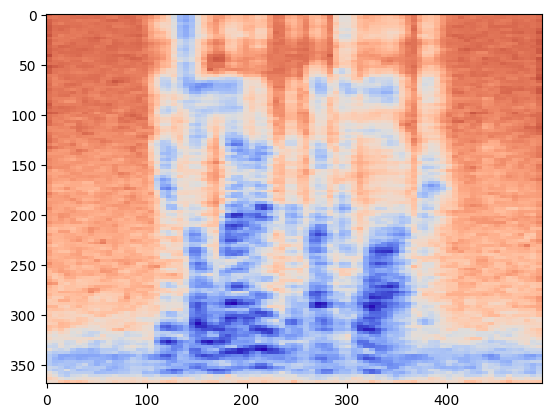

In [9]:
plt.imshow(cv2.imread('spec.png'))

In [12]:
df_audio['ActorID'] = df_audio['actor_id'].astype(int)
df_demo['ActorID'] = df_demo['ActorID'].astype(int)

In [13]:
df_audio_merged = pd.merge(df_audio, df_demo, on='ActorID', how='left')

In [14]:
df_audio_merged

,Audio_file,actor_id,sentence,emotion,emotional_intensity,ActorID,Age,Sex,Race,Ethnicity
0,/var/scratch/mpa326/CREMA-D/AudioWAV/1001_DFA_ANG_XX.wav,1001,DFA,ANG,XX,1001,51,Male,Caucasian,Not Hispanic
1,/var/scratch/mpa326/CREMA-D/AudioWAV/1001_DFA_DIS_XX.wav,1001,DFA,DIS,XX,1001,51,Male,Caucasian,Not Hispanic
2,/var/scratch/mpa326/CREMA-D/AudioWAV/1001_DFA_FEA_XX.wav,1001,DFA,FEA,XX,1001,51,Male,Caucasian,Not Hispanic
3,/var/scratch/mpa326/CREMA-D/AudioWAV/1001_DFA_HAP_XX.wav,1001,DFA,HAP,XX,1001,51,Male,Caucasian,Not Hispanic
4,/var/scratch/mpa326/CREMA-D/AudioWAV/1001_DFA_NEU_XX.wav,1001,DFA,NEU,XX,1001,51,Male,Caucasian,Not Hispanic
...,...,...,...,...,...,...,...,...,...,...
7437,/var/scratch/mpa326/CREMA-D/AudioWAV/1091_WSI_DIS_XX.wav,1091,WSI,DIS,XX,1091,29,Female,Asian,Not Hispanic
7438,/var/scratch/mpa326/CREMA-D/AudioWAV/1091_WSI_FEA_XX.wav,1091,WSI,FEA,XX,1091,29,Female,Asian,Not Hispanic
7439,/var/scratch/mpa326/CREMA-D/AudioWAV/1091_WSI_HAP_XX.wav,1091,WSI,HAP,XX,1091,29,Female,Asian,Not Hispanic
7440,/var/scratch/mpa326/CREMA-D/AudioWAV/1091_WSI_NEU_XX.wav,1091,WSI,NEU,XX,1091,29,Female,Asian,Not Hispanic


In [19]:
print(df_audio_merged['Sex'].value_counts(),
df_audio_merged['Race'].value_counts(),
df_audio_merged['Ethnicity'].value_counts())

Sex
Male      3930
Female    3512
Name: count, dtype: int64 Race
Caucasian           4988
African American    1804
Asian                568
Unknown               82
Name: count, dtype: int64 Ethnicity
Not Hispanic    6622
Hispanic         820
Name: count, dtype: int64


In [23]:
emotions_en=df_audio_merged.emotion.unique()
emotions_en

array(['ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'], dtype=object)

In [26]:
labels = []
path_mels = []
genders = []
folder='/var/scratch/mpa326/cremad_melspec_new/'
for class_index, class_name in enumerate(emotions_en):
            
            # Display the name of the class whose data is being extracted.
            print(f'Extracting Data of Class: {class_name}')
            
            # Get the list of video files present in the specific class name directory.
            files_list = list(df_audio_merged.Audio_file[df_audio_merged.emotion == class_name])
            
            # Iterate through all the files present in the files list.
            for video_file_path in files_list:
              y, sr = load_spec(video_file_path,1)
              fig = plt.Figure()
              canvas = FigureCanvas(fig)
              ax = fig.add_subplot(111)
              ax.set_axis_off()
              p = librosa.display.specshow(librosa.power_to_db(y), ax=ax)
              path=video_file_path.split('/')[-1].split('.')[0]
              fig.savefig(folder+path+'.png',bbox_inches='tight',pad_inches=0.0)
              labels.append(class_index)
              genders.append(df_audio_merged.Sex[df_audio_merged.Audio_file == video_file_path].values[0])
              path_mels.append(folder+path+'.png')

Extracting Data of Class: ANG
Extracting Data of Class: DIS
Extracting Data of Class: FEA
Extracting Data of Class: HAP
Extracting Data of Class: NEU
Extracting Data of Class: SAD


In [95]:
train_df = pd.read_csv('cremad_audiotrain_set.csv')
val_df = pd.read_csv('cremad_audioval_set.csv')
test_df = pd.read_csv('cremad_audiotest_set.csv')

# Extract paths, gender, and emotion labels from train set
train_paths = train_df['melspec_path']  # Replace 'data' with the actual column name for paths if different
train_genders = train_df['gender']
train_emotions = train_df['emotion']

# Extract paths, gender, and emotion labels from validation set
val_paths = val_df['melspec_path']  # Replace 'data' with the actual column name for paths if different
val_genders = val_df['gender']
val_emotions = val_df['emotion']

# Extract paths, gender, and emotion labels from test set
test_paths = test_df['melspec_path']  # Replace 'data' with the actual column name for paths if different
test_genders = test_df['gender']
test_emotions = test_df['emotion']

# Print or verify the extracted data
print("Train paths:", train_paths.head())
print("Train genders:", train_genders.head())
print("Train emotions:", train_emotions.head())

print("Validation paths:", val_paths.head())
print("Validation genders:", val_genders.head())
print("Validation emotions:", val_emotions.head())

print("Test paths:", test_paths.head())
print("Test genders:", test_genders.head())
print("Test emotions:", test_emotions.head())

Train paths: 0    /var/scratch/mpa326/cremad_melspec_new/1034_WSI_NEU_XX.png
1    /var/scratch/mpa326/cremad_melspec_new/1018_DFA_DIS_XX.png
2    /var/scratch/mpa326/cremad_melspec_new/1060_TAI_HAP_XX.png
3    /var/scratch/mpa326/cremad_melspec_new/1072_ITH_SAD_XX.png
4    /var/scratch/mpa326/cremad_melspec_new/1052_IEO_DIS_LO.png
Name: melspec_path, dtype: object
Train genders: 0      Male
1    Female
2    Female
3    Female
4    Female
Name: gender, dtype: object
Train emotions: 0    NEU
1    DIS
2    HAP
3    SAD
4    DIS
Name: emotion, dtype: object
Validation paths: 0    /var/scratch/mpa326/cremad_melspec_new/1028_TSI_NEU_XX.png
1    /var/scratch/mpa326/cremad_melspec_new/1064_DFA_FEA_XX.png
2    /var/scratch/mpa326/cremad_melspec_new/1015_TSI_DIS_XX.png
3    /var/scratch/mpa326/cremad_melspec_new/1055_IOM_ANG_XX.png
4    /var/scratch/mpa326/cremad_melspec_new/1008_IOM_FEA_XX.png
Name: melspec_path, dtype: object
Validation genders: 0    Female
1      Male
2      Male
3    Female


In [65]:
import os
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_colwidth', None) # Show full column content
pd.set_option('display.expand_frame_repr', False) 
def create_new_path(old_path):
    # Extract the filename from the old path
    filename = os.path.basename(old_path)
    # Change the extension from .flv to .png
    new_filename = os.path.splitext(filename)[0] + '.png'
    # Create the new path with the new base directory
    new_path = f"/var/scratch/mpa326/cremad_melspec_new/{new_filename}"
    return new_path

file_path1 = '/var/scratch/mpa326/CREMA-D_code/Video_paths_for_audio_file/video_train_50m_50f_paths.csv'
file_path2 = '/var/scratch/mpa326/CREMA-D_code/Video_paths_for_audio_file/video_train_40m_60f_paths.csv'
file_path3 = '/var/scratch/mpa326/CREMA-D_code/Video_paths_for_audio_file/video_train_60m_40f_paths.csv'
file_path4 = '/var/scratch/mpa326/CREMA-D_code/Video_paths_for_audio_file/video_test_paths.csv'
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)
X_train_aud_50m_50f = pd.DataFrame()
X_train_aud_40m_60f = pd.DataFrame()
X_train_aud_60m_40f = pd.DataFrame()
X_test_aud = pd.DataFrame()
X_train_aud_50m_50f['melspec_path'] = df1['video_file_path'].apply(create_new_path)
X_train_aud_40m_60f['melspec_path'] = df2['video_file_path'].apply(create_new_path)
X_train_aud_60m_40f['melspec_path'] = df3['video_file_path'].apply(create_new_path)
X_test_aud['melspec_path'] = df4['video_file_path'].apply(create_new_path)
print(X_train_aud_50m_50f)
X_train_aud_50m_50f.to_csv('paths_train_audio_50m_50f.csv', index=False)
X_train_aud_40m_60f.to_csv('paths_train_audio_40m_60f.csv', index=False)
X_train_aud_60m_40f.to_csv('paths_train_audio_60m_40f.csv', index=False)
X_test_aud.to_csv('paths_test_audio.csv', index=False)


                                                    melspec_path
0     /var/scratch/mpa326/cremad_melspec_new/1091_MTI_ANG_XX.png
1     /var/scratch/mpa326/cremad_melspec_new/1058_MTI_ANG_XX.png
2     /var/scratch/mpa326/cremad_melspec_new/1028_TAI_ANG_XX.png
3     /var/scratch/mpa326/cremad_melspec_new/1063_IWL_ANG_XX.png
4     /var/scratch/mpa326/cremad_melspec_new/1089_IWW_ANG_XX.png
5     /var/scratch/mpa326/cremad_melspec_new/1002_TIE_ANG_XX.png
6     /var/scratch/mpa326/cremad_melspec_new/1056_DFA_ANG_XX.png
7     /var/scratch/mpa326/cremad_melspec_new/1029_WSI_ANG_XX.png
8     /var/scratch/mpa326/cremad_melspec_new/1046_IEO_ANG_MD.png
9     /var/scratch/mpa326/cremad_melspec_new/1073_IWL_ANG_XX.png
10    /var/scratch/mpa326/cremad_melspec_new/1074_ITH_ANG_XX.png
11    /var/scratch/mpa326/cremad_melspec_new/1061_WSI_ANG_XX.png
12    /var/scratch/mpa326/cremad_melspec_new/1006_IOM_ANG_XX.png
13    /var/scratch/mpa326/cremad_melspec_new/1091_IOM_ANG_XX.png
14    /var/scratch/mpa326

In [66]:
train_paths_aud_50m_50f = X_train_aud_50m_50f['melspec_path']
train_paths_aud_40m_60f = X_train_aud_40m_60f['melspec_path']
train_paths_aud_60m_40f = X_train_aud_60m_40f['melspec_path']
test_paths_aud = X_test_aud['melspec_path']

In [70]:
X_test_aud.shape

(1487, 1)

In [71]:
df_train_aud_50m_50f=np.ones((4678, 128, 128, 3),dtype='uint8')
df_train_aud_40m_60f=np.ones((4678, 128, 128, 3),dtype='uint8')
df_train_aud_60m_40f=np.ones((4677, 128, 128, 3),dtype='uint8')
df_test = np.ones((1487, 128, 128, 3), dtype='uint8')
for i in range(4678):
  img=cv2.imread(train_paths_aud_50m_50f[i])
  img=cv2.resize(img,(128, 128))
  df_train_aud_50m_50f[i]=img

for i in range(4678):
  img=cv2.imread(train_paths_aud_40m_60f[i])
  img=cv2.resize(img,(128, 128))
  df_train_aud_40m_60f[i]=img

for i in range(4677):
  img=cv2.imread(train_paths_aud_60m_40f[i])
  img=cv2.resize(img,(128, 128))
  df_train_aud_60m_40f[i]=img


for i in range(1487):
    img=cv2.imread(test_paths_aud[i])
    img=cv2.resize(img,(128,128))
    df_test[i] = img

In [72]:
df1 = {'features':df_train_aud_50m_50f}
df2 = {'features':df_train_aud_40m_60f}
df3 = {'features':df_train_aud_60m_40f}
df4 = {'features':df_test}

In [73]:
datafile = open('audio_train_50m_50f', 'ab')
pickle.dump(df1, datafile)                     
datafile.close()

In [74]:
datafile = open('audio_train_40m_60f', 'ab')
pickle.dump(df2, datafile)                     
datafile.close()

In [75]:
datafile = open('audio_train_60m_40f', 'ab')
pickle.dump(df3, datafile)                     
datafile.close()

In [76]:
datafile = open('audio_test_common', 'ab')
pickle.dump(df4, datafile)                     
datafile.close()

In [109]:
# video_files_paths = data['video_files_paths']
# gender_train = data['genders']
# label_train = data['labels']
# df_train_files_paths = pd.DataFrame(video_files_paths, columns=['video_files_paths'])
# df_train_files_paths['genders'] = gender_train
# df_train_files_paths['labels'] = label_train
# df_train_files_paths

,video_files_paths,genders,labels
0,/var/scratch/mpa326/CREMA-D/VideoFlash/1058_WSI_ANG_XX.flv,Female,0
1,/var/scratch/mpa326/CREMA-D/VideoFlash/1032_WSI_ANG_XX.flv,Male,0
2,/var/scratch/mpa326/CREMA-D/VideoFlash/1066_TIE_ANG_XX.flv,Male,0
3,/var/scratch/mpa326/CREMA-D/VideoFlash/1030_IEO_ANG_MD.flv,Female,0
4,/var/scratch/mpa326/CREMA-D/VideoFlash/1041_DFA_ANG_XX.flv,Male,0
...,...,...,...
5200,/var/scratch/mpa326/CREMA-D/VideoFlash/1042_IWL_SAD_XX.flv,Male,5
5201,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_IOM_SAD_XX.flv,Male,5
5202,/var/scratch/mpa326/CREMA-D/VideoFlash/1024_IEO_SAD_LO.flv,Female,5
5203,/var/scratch/mpa326/CREMA-D/VideoFlash/1087_WSI_SAD_XX.flv,Male,5


In [110]:
# def convert_to_audio_path(video_path):
#     base_name = video_path.split('/')[-1].replace('.flv', '.png')
#     audio_path = f'/var/scratch/mpa326/cremad_melspec_new/{base_name}'
#     return audio_path

In [111]:
# df_train_files_paths['audio_melspec_paths'] = df_train_files_paths['video_files_paths'].apply(convert_to_audio_path)

In [112]:
# df_train_files_paths

,video_files_paths,genders,labels,audio_melspec_paths
0,/var/scratch/mpa326/CREMA-D/VideoFlash/1058_WSI_ANG_XX.flv,Female,0,/var/scratch/mpa326/cremad_melspec_new/1058_WSI_ANG_XX.png
1,/var/scratch/mpa326/CREMA-D/VideoFlash/1032_WSI_ANG_XX.flv,Male,0,/var/scratch/mpa326/cremad_melspec_new/1032_WSI_ANG_XX.png
2,/var/scratch/mpa326/CREMA-D/VideoFlash/1066_TIE_ANG_XX.flv,Male,0,/var/scratch/mpa326/cremad_melspec_new/1066_TIE_ANG_XX.png
3,/var/scratch/mpa326/CREMA-D/VideoFlash/1030_IEO_ANG_MD.flv,Female,0,/var/scratch/mpa326/cremad_melspec_new/1030_IEO_ANG_MD.png
4,/var/scratch/mpa326/CREMA-D/VideoFlash/1041_DFA_ANG_XX.flv,Male,0,/var/scratch/mpa326/cremad_melspec_new/1041_DFA_ANG_XX.png
...,...,...,...,...
5200,/var/scratch/mpa326/CREMA-D/VideoFlash/1042_IWL_SAD_XX.flv,Male,5,/var/scratch/mpa326/cremad_melspec_new/1042_IWL_SAD_XX.png
5201,/var/scratch/mpa326/CREMA-D/VideoFlash/1001_IOM_SAD_XX.flv,Male,5,/var/scratch/mpa326/cremad_melspec_new/1001_IOM_SAD_XX.png
5202,/var/scratch/mpa326/CREMA-D/VideoFlash/1024_IEO_SAD_LO.flv,Female,5,/var/scratch/mpa326/cremad_melspec_new/1024_IEO_SAD_LO.png
5203,/var/scratch/mpa326/CREMA-D/VideoFlash/1087_WSI_SAD_XX.flv,Male,5,/var/scratch/mpa326/cremad_melspec_new/1087_WSI_SAD_XX.png


In [115]:
# with open('/var/scratch/mpa326/CREMA-D_code/cremad_video_val', 'rb') as file:
#     data = pickle.load(file)
# video_files_paths = data['video_files_paths']
# gender_val = data['genders']
# label_val = data['labels']
# df_val_files_paths = pd.DataFrame(video_files_paths, columns=['video_files_paths'])
# df_val_files_paths['genders'] = gender_val
# df_val_files_paths['labels'] = label_val
# df_val_files_paths['audio_melspec_paths'] = df_val_files_paths['video_files_paths'].apply(convert_to_audio_path)
# df_val_files_paths

,video_files_paths,genders,labels,audio_melspec_paths
0,/var/scratch/mpa326/CREMA-D/VideoFlash/1055_IOM_ANG_XX.flv,Female,0,/var/scratch/mpa326/cremad_melspec_new/1055_IOM_ANG_XX.png
1,/var/scratch/mpa326/CREMA-D/VideoFlash/1033_MTI_ANG_XX.flv,Male,0,/var/scratch/mpa326/cremad_melspec_new/1033_MTI_ANG_XX.png
2,/var/scratch/mpa326/CREMA-D/VideoFlash/1053_ITH_ANG_XX.flv,Female,0,/var/scratch/mpa326/cremad_melspec_new/1053_ITH_ANG_XX.png
3,/var/scratch/mpa326/CREMA-D/VideoFlash/1011_ITH_ANG_XX.flv,Male,0,/var/scratch/mpa326/cremad_melspec_new/1011_ITH_ANG_XX.png
4,/var/scratch/mpa326/CREMA-D/VideoFlash/1065_TAI_ANG_XX.flv,Male,0,/var/scratch/mpa326/cremad_melspec_new/1065_TAI_ANG_XX.png
...,...,...,...,...
1110,/var/scratch/mpa326/CREMA-D/VideoFlash/1006_IWL_SAD_XX.flv,Female,5,/var/scratch/mpa326/cremad_melspec_new/1006_IWL_SAD_XX.png
1111,/var/scratch/mpa326/CREMA-D/VideoFlash/1010_IOM_SAD_XX.flv,Female,5,/var/scratch/mpa326/cremad_melspec_new/1010_IOM_SAD_XX.png
1112,/var/scratch/mpa326/CREMA-D/VideoFlash/1007_IWW_SAD_XX.flv,Female,5,/var/scratch/mpa326/cremad_melspec_new/1007_IWW_SAD_XX.png
1113,/var/scratch/mpa326/CREMA-D/VideoFlash/1083_IEO_SAD_HI.flv,Male,5,/var/scratch/mpa326/cremad_melspec_new/1083_IEO_SAD_HI.png


In [116]:
# with open('/var/scratch/mpa326/CREMA-D_code/cremad_video_test', 'rb') as file:
#     data = pickle.load(file)
# video_files_paths = data['video_files_paths']
# gender_test = data['genders']
# label_test = data['labels']
# df_test_files_paths = pd.DataFrame(video_files_paths, columns=['video_files_paths'])
# df_test_files_paths['genders'] = gender_test
# df_test_files_paths['labels'] = label_test
# df_test_files_paths['audio_melspec_paths'] = df_test_files_paths['video_files_paths'].apply(convert_to_audio_path)
# df_test_files_paths

,video_files_paths,genders,labels,audio_melspec_paths
0,/var/scratch/mpa326/CREMA-D/VideoFlash/1038_DFA_ANG_XX.flv,Male,0,/var/scratch/mpa326/cremad_melspec_new/1038_DFA_ANG_XX.png
1,/var/scratch/mpa326/CREMA-D/VideoFlash/1081_IEO_ANG_LO.flv,Male,0,/var/scratch/mpa326/cremad_melspec_new/1081_IEO_ANG_LO.png
2,/var/scratch/mpa326/CREMA-D/VideoFlash/1031_DFA_ANG_XX.flv,Male,0,/var/scratch/mpa326/cremad_melspec_new/1031_DFA_ANG_XX.png
3,/var/scratch/mpa326/CREMA-D/VideoFlash/1057_MTI_ANG_XX.flv,Male,0,/var/scratch/mpa326/cremad_melspec_new/1057_MTI_ANG_XX.png
4,/var/scratch/mpa326/CREMA-D/VideoFlash/1091_TIE_ANG_XX.flv,Female,0,/var/scratch/mpa326/cremad_melspec_new/1091_TIE_ANG_XX.png
...,...,...,...,...
1111,/var/scratch/mpa326/CREMA-D/VideoFlash/1023_ITS_SAD_XX.flv,Male,5,/var/scratch/mpa326/cremad_melspec_new/1023_ITS_SAD_XX.png
1112,/var/scratch/mpa326/CREMA-D/VideoFlash/1022_IWL_SAD_XX.flv,Male,5,/var/scratch/mpa326/cremad_melspec_new/1022_IWL_SAD_XX.png
1113,/var/scratch/mpa326/CREMA-D/VideoFlash/1033_IOM_SAD_XX.flv,Male,5,/var/scratch/mpa326/cremad_melspec_new/1033_IOM_SAD_XX.png
1114,/var/scratch/mpa326/CREMA-D/VideoFlash/1074_IWW_SAD_XX.flv,Female,5,/var/scratch/mpa326/cremad_melspec_new/1074_IWW_SAD_XX.png


In [118]:
# df_train=np.ones((5205, 128, 128, 3),dtype='uint8')
# df_val = np.ones((1115, 128, 128, 3), dtype='uint8')
# df_test = np.ones((1116, 128, 128, 3), dtype='uint8')
# train_paths = df_train_files_paths['audio_melspec_paths']
# val_paths = df_val_files_paths['audio_melspec_paths']
# test_paths = df_test_files_paths['audio_melspec_paths']
# for i in range(5205):
#   img=cv2.imread(train_paths[i])
#   img=cv2.resize(img,(128, 128))
#   df_train[i]=img

# for i in range(1115):
#     img=cv2.imread(val_paths[i])
#     img=cv2.resize(img,(128,128))
#     df_val[i] = img

# for i in range(1116):
#     img=cv2.imread(test_paths[i])
#     img=cv2.resize(img,(128,128))
#     df_test[i] = img

In [119]:
# df1 = {'features':df_train, 'labels':df_train_files_paths['labels'], 'genders':df_train_files_paths['genders'], 'audio_file_paths':train_paths}

In [121]:
# datafile = open('audio_train', 'ab')
# pickle.dump(df1, datafile)                     
# datafile.close()

In [122]:
# df_train.shape

(5205, 128, 128, 3)

In [123]:
# df1 = {'features':df_val, 'labels':df_val_files_paths['labels'], 'genders':df_val_files_paths['genders'], 'audio_file_paths':val_paths}

# datafile = open('audio_val', 'ab')
# pickle.dump(df1, datafile)                     
# datafile.close()

In [124]:
# df1 = {'features':df_test, 'labels':df_test_files_paths['labels'], 'genders':df_test_files_paths['genders'], 'audio_file_paths':test_paths}

# datafile = open('audio_test', 'ab')
# pickle.dump(df1, datafile)                     
# datafile.close()